**Human Connectome Project: resting state fMRI**

n_subjects: `812`  
n_timepoints: `4800` x 0.75s = 3600s = 60min  
n_regions: `15, 25, 50, 100, 300`  

regions defined by decomposing group-level ICA maps at various spatial scales

timeseries preprocessing:
1. highpass filtered
2. mean-centered
3. removal of phyiological + motion confounds using linear regression:  
    ICA noise components classified by FIX algorithm +   24 head motion parameters

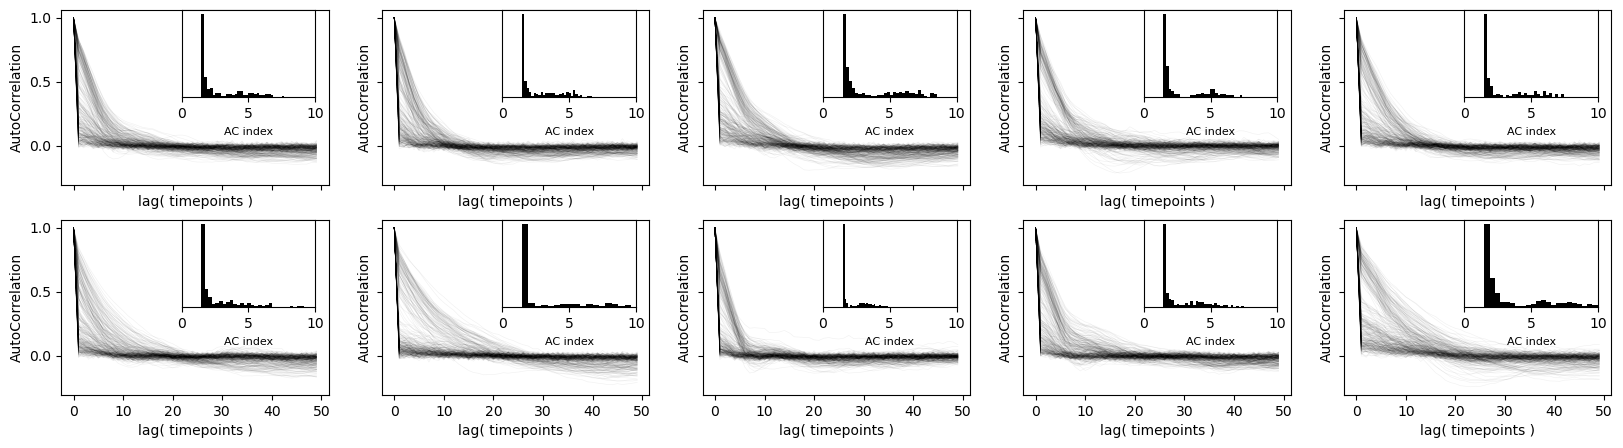

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neurodsp import spectral

from src import acf_utils


def calc_aci(X_acf):
    """calculate the auto-correlation index (ACI) for each timeseries/region."""
    return np.sum(X_acf**2, axis=1)


n_subjects, n_regions, n_timepoints = 10, 300, 4800
sampling_rate = 1 / 0.75
Xs = np.load("../tests/data/nsubjects-10_nregions-300_hcp.npy")

fig, axs = plt.subplots(2, 5, figsize=(20, 5), sharex=True, sharey=True)
axs = axs.flatten()  # type: ignore

for X, ax in zip(Xs, axs):
    """plot the ACF per region + the distribution of ACI across regions"""

    X_acf = acf_utils.acf_fft(X, n_timepoints)
    X_aci = calc_aci(X_acf)

    ax.plot(X_acf[:, :50].T, alpha=0.05, c="k", lw=0.5)
    ax.set_yticks([0, 0.5, 1])
    ax.set_xlabel("lag( timepoints )")
    ax.set_ylabel("AutoCorrelation")

    inset_ax = ax.inset_axes([0.45, 0.5, 0.5, 0.5])
    inset_ax.hist(X_aci, bins=30, density=True, color="k")
    inset_ax.set_yticks([])
    inset_ax.set_xlim([0, 10])
    inset_ax.set_xlabel("AC index", fontsize=8)


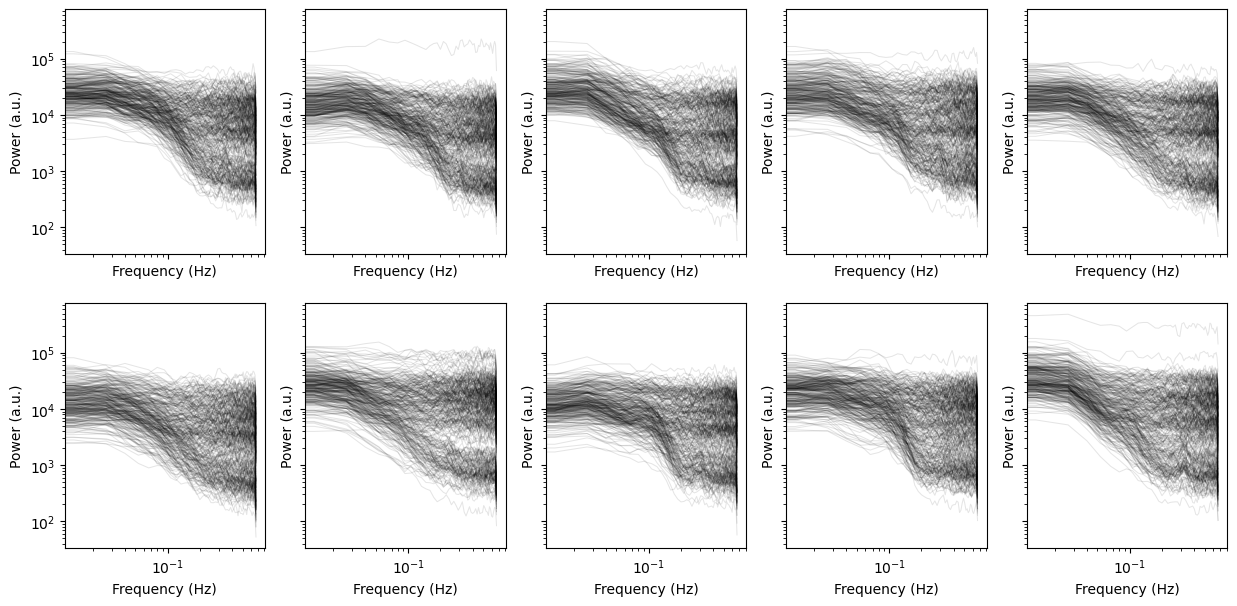

In [2]:
fig, axs = plt.subplots(2, 5, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.flatten()  # type: ignore

for X, ax in zip(Xs, axs):
    """plot the PSD of the timeseries per region"""
    freqs, powers = spectral.compute_spectrum(X, sampling_rate, nperseg=100)

    ax.loglog(np.tile(freqs, (n_regions, 1)).T, powers.T, color="k", lw=0.75, alpha=0.1)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power (a.u.)")
